In [1]:
#importing necessary python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#setting the right directory
os.chdir('C:\\Users\\U0033207PC\\Desktop\\GENE Enrichment\\FINAL VISUALISATION\\ANALYTICS\CLUSTERING')

In [3]:
# Importing the dataset
dt = pd.read_csv('FLUX_PATHWAYS.csv')

In [4]:
dt

,HUG0_SYMBOL,Fatty acid activation (cytosolic),Fatty acid oxidation,Folate metabolism,Glycolysis / Gluconeogenesis,OverallSurvivalMonths
0,TCGA-05-4244-01,249.678953,203.645436,174.799119,975.407107,0.00
1,TCGA-05-4249-01,159.843340,192.578976,162.708229,596.051379,50.03
2,TCGA-05-4250-01,238.077530,178.637863,159.695851,792.714842,3.98
3,TCGA-05-4382-01,195.749178,197.644572,173.262205,826.557095,19.94
4,TCGA-05-4384-01,192.524866,240.636053,151.606225,636.320877,13.99
...,...,...,...,...,...,...
512,TCGA-NJ-A55O-01,227.284708,255.274625,189.678153,623.798162,0.43
513,TCGA-NJ-A55R-01,211.402180,202.299694,146.959022,1004.267624,19.81
514,TCGA-NJ-A7XG-01,205.300527,278.656361,196.454134,664.169068,20.27
515,TCGA-O1-A52J-01,192.721117,201.601313,120.790608,634.993890,59.07


In [5]:
columns_of_interest = ['HUG0_SYMBOL','Fatty acid activation (cytosolic)','Fatty acid oxidation','Folate metabolism','Glycolysis / Gluconeogenesis','OverallSurvivalMonths']

In [6]:
p_dt = dt.loc[:,columns_of_interest]

In [7]:
p_dt[['HUG0_SYMBOL']]=p_dt.HUG0_SYMBOL.str.split(" ",expand=True,).loc[:,0]

In [8]:
p_dt.head()

,HUG0_SYMBOL,Fatty acid activation (cytosolic),Fatty acid oxidation,Folate metabolism,Glycolysis / Gluconeogenesis,OverallSurvivalMonths
0,TCGA-05-4244-01,249.678953,203.645436,174.799119,975.407107,0.00
1,TCGA-05-4249-01,159.843340,192.578976,162.708229,596.051379,50.03
2,TCGA-05-4250-01,238.077530,178.637863,159.695851,792.714842,3.98
3,TCGA-05-4382-01,195.749178,197.644572,173.262205,826.557095,19.94
4,TCGA-05-4384-01,192.524866,240.636053,151.606225,636.320877,13.99


In [9]:
p1_data=p_dt.select_dtypes(np.number)

In [10]:
p1_data.head()

,Fatty acid activation (cytosolic),Fatty acid oxidation,Folate metabolism,Glycolysis / Gluconeogenesis,OverallSurvivalMonths
0,249.678953,203.645436,174.799119,975.407107,0.00
1,159.843340,192.578976,162.708229,596.051379,50.03
2,238.077530,178.637863,159.695851,792.714842,3.98
3,195.749178,197.644572,173.262205,826.557095,19.94
4,192.524866,240.636053,151.606225,636.320877,13.99


In [11]:
dc = "OverallSurvivalMonths";
z1 = p1_data.pop(dc).values

In [12]:
conc1 = np.vstack(z1)
z1 = pd.DataFrame(conc1, columns=['OverallSurvivalMonths'])

In [13]:
p2_info=p_dt.select_dtypes(exclude='float')

In [14]:
p2_info.head()

,HUG0_SYMBOL
0,TCGA-05-4244-01
1,TCGA-05-4249-01
2,TCGA-05-4250-01
3,TCGA-05-4382-01
4,TCGA-05-4384-01


In [15]:
p2_info.HUG0_SYMBOL.unique()

array(['TCGA-05-4244-01', 'TCGA-05-4249-01', 'TCGA-05-4250-01',
       'TCGA-05-4382-01', 'TCGA-05-4384-01', 'TCGA-05-4389-01',
       'TCGA-05-4390-01', 'TCGA-05-4395-01', 'TCGA-05-4396-01',
       'TCGA-05-4397-01', 'TCGA-05-4398-01', 'TCGA-05-4402-01',
       'TCGA-05-4403-01', 'TCGA-05-4405-01', 'TCGA-05-4410-01',
       'TCGA-05-4415-01', 'TCGA-05-4417-01', 'TCGA-05-4418-01',
       'TCGA-05-4420-01', 'TCGA-05-4422-01', 'TCGA-05-4424-01',
       'TCGA-05-4425-01', 'TCGA-05-4426-01', 'TCGA-05-4427-01',
       'TCGA-05-4430-01', 'TCGA-05-4432-01', 'TCGA-05-4433-01',
       'TCGA-05-4434-01', 'TCGA-05-5420-01', 'TCGA-05-5423-01',
       'TCGA-05-5425-01', 'TCGA-05-5428-01', 'TCGA-05-5429-01',
       'TCGA-05-5715-01', 'TCGA-35-3615-01', 'TCGA-35-4122-01',
       'TCGA-35-4123-01', 'TCGA-35-5375-01', 'TCGA-38-4625-01',
       'TCGA-38-4626-01', 'TCGA-38-4627-01', 'TCGA-38-4628-01',
       'TCGA-38-4629-01', 'TCGA-38-4630-01', 'TCGA-38-4631-01',
       'TCGA-38-4632-01', 'TCGA-38-6178-

In [16]:
HUG0_SYMBOL=p2_info.HUG0_SYMBOL.tolist()

In [17]:
# PCA with SCALED DATA
pca_scaled = make_pipeline(StandardScaler(),
                          PCA(n_components=4, random_state=0))

In [18]:
p_scaled = pca_scaled.fit_transform(p1_data)

In [19]:
pca_scaled.named_steps['standardscaler'].fit_transform(p1_data)

array([[ 0.91675312, -0.41754196,  0.65475026,  0.91696077],
       [-1.02397102, -0.77751511,  0.35059738, -0.8063071 ],
       [ 0.66612689, -1.23099581,  0.27481938,  0.08705973],
       ...,
       [-0.04195667,  2.02243597,  1.19949389, -0.49687451],
       [-0.31371043, -0.48403379, -0.70386309, -0.62940618],
       [ 0.15895747,  0.57237147,  1.69653342, -0.81538979]])

In [20]:
pca_scaled.named_steps['pca']

PCA(copy=True, iterated_power='auto', n_components=4, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
var_explained=pca_scaled.named_steps['pca'].explained_variance_ratio_*100

In [22]:
var_explained

array([41.65088133, 30.78530952, 16.09050261, 11.47330654])

In [23]:
p4_scaled = pd.DataFrame( data = p_scaled,
                        columns = ['PC1','PC2','PC3','PC4'])

In [24]:
scores_pca = p4_scaled

In [25]:
# Fit K means using the transformed data from the PCA
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++')
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

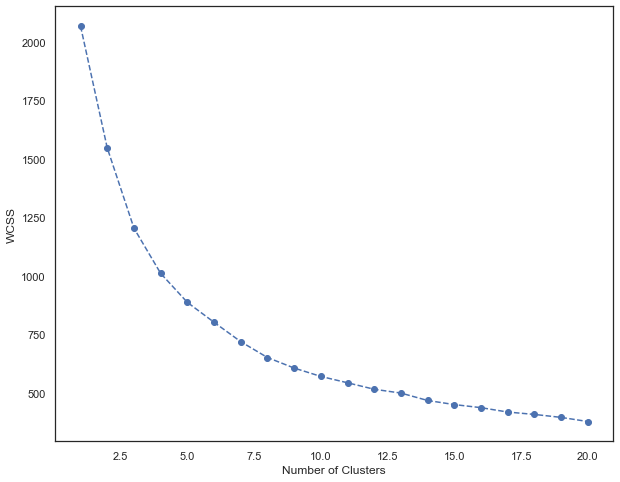

In [27]:
plt.figure(figsize = (10,8))
ax = plt.axes()
sns.set_style("white")
plt.plot(range(1, 21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\ANALYTICS\CLUSTERING\Flux_Pathways_Elbow_Plot.pdf', bbox_inches="tight")
plt.show()

In [28]:
# We have chosen four clusters, so we run K-means with number of clusters equals four.
# Same initializer 
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++')

In [29]:
# Fit with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
y_kmeans = kmeans_pca.fit_predict(scores_pca)

In [31]:
y_kmeans

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [32]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
dt_pca_kmeans = pd.concat([dt.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
dt_pca_kmeans.columns.values[-4:] = ['PC1','PC2','PC3','PC4']
# The last column we add contains the pca k-means clustering labels.
dt_pca_kmeans['Segment'] = kmeans_pca.labels_


In [33]:
dt_pca_kmeans

,HUG0_SYMBOL,Fatty acid activation (cytosolic),Fatty acid oxidation,Folate metabolism,Glycolysis / Gluconeogenesis,OverallSurvivalMonths,PC1,PC2,PC3,PC4,Segment
0,TCGA-05-4244-01,249.678953,203.645436,174.799119,975.407107,0.00,1.293247,0.777384,-0.049765,0.070719,1
1,TCGA-05-4249-01,159.843340,192.578976,162.708229,596.051379,50.03,-0.842977,0.020529,-0.632015,-1.147006,0
2,TCGA-05-4250-01,238.077530,178.637863,159.695851,792.714842,3.98,0.462941,0.955006,-0.955143,-0.059421,0
3,TCGA-05-4382-01,195.749178,197.644572,173.262205,826.557095,19.94,0.237389,0.501537,-0.153377,-0.737040,0
4,TCGA-05-4384-01,192.524866,240.636053,151.606225,636.320877,13.99,-0.270400,-1.003226,0.143327,-0.109464,0
...,...,...,...,...,...,...,...,...,...,...,...
512,TCGA-NJ-A55O-01,227.284708,255.274625,189.678153,623.798162,0.43,0.891383,-1.568143,-0.032153,-0.216301,1
513,TCGA-NJ-A55R-01,211.402180,202.299694,146.959022,1004.267624,19.81,0.340199,1.008783,0.430859,0.048817,0
514,TCGA-NJ-A7XG-01,205.300527,278.656361,196.454134,664.169068,20.27,0.871795,-2.075142,0.711807,-0.452515,1
515,TCGA-O1-A52J-01,192.721117,201.601313,120.790608,634.993890,59.07,-0.961573,0.107368,-0.513570,0.156124,0


In [34]:
dt_pca_kmeans = dt_pca_kmeans.merge(z1,left_index=True,right_index=True)

In [35]:
dt_pca_kmeans

,HUG0_SYMBOL,Fatty acid activation (cytosolic),Fatty acid oxidation,Folate metabolism,Glycolysis / Gluconeogenesis,OverallSurvivalMonths_x,PC1,PC2,PC3,PC4,Segment,OverallSurvivalMonths_y
0,TCGA-05-4244-01,249.678953,203.645436,174.799119,975.407107,0.00,1.293247,0.777384,-0.049765,0.070719,1,0.00
1,TCGA-05-4249-01,159.843340,192.578976,162.708229,596.051379,50.03,-0.842977,0.020529,-0.632015,-1.147006,0,50.03
2,TCGA-05-4250-01,238.077530,178.637863,159.695851,792.714842,3.98,0.462941,0.955006,-0.955143,-0.059421,0,3.98
3,TCGA-05-4382-01,195.749178,197.644572,173.262205,826.557095,19.94,0.237389,0.501537,-0.153377,-0.737040,0,19.94
4,TCGA-05-4384-01,192.524866,240.636053,151.606225,636.320877,13.99,-0.270400,-1.003226,0.143327,-0.109464,0,13.99
...,...,...,...,...,...,...,...,...,...,...,...,...
512,TCGA-NJ-A55O-01,227.284708,255.274625,189.678153,623.798162,0.43,0.891383,-1.568143,-0.032153,-0.216301,1,0.43
513,TCGA-NJ-A55R-01,211.402180,202.299694,146.959022,1004.267624,19.81,0.340199,1.008783,0.430859,0.048817,0,19.81
514,TCGA-NJ-A7XG-01,205.300527,278.656361,196.454134,664.169068,20.27,0.871795,-2.075142,0.711807,-0.452515,1,20.27
515,TCGA-O1-A52J-01,192.721117,201.601313,120.790608,634.993890,59.07,-0.961573,0.107368,-0.513570,0.156124,0,59.07


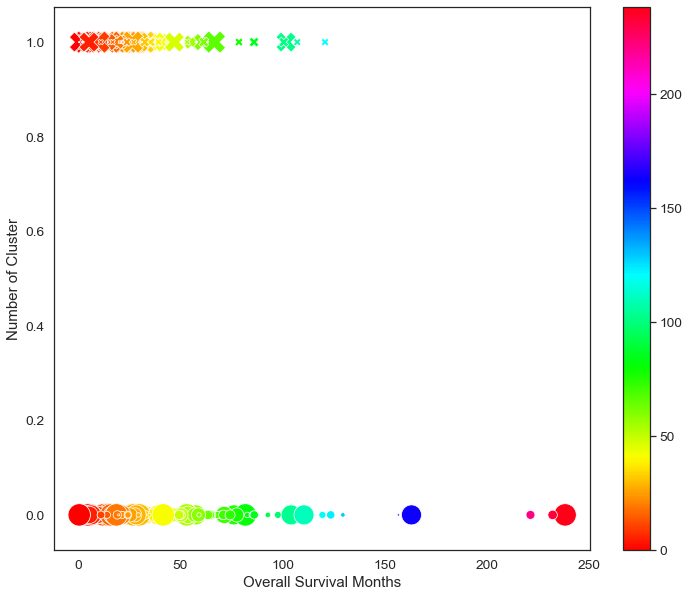

In [36]:
# Plot Graph
points_size = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]

plt.figure(figsize=(12,10))
sns.set_style("white")
with sns.plotting_context("notebook", font_scale=1.25):
    ax=sns.scatterplot(x="OverallSurvivalMonths_y", y="Segment",
                   data=dt_pca_kmeans,
                   hue="OverallSurvivalMonths_y",
                   style="Segment",
                   palette='hsv', 
                   s=points_size
                   )
    
    norm = plt.Normalize(dt_pca_kmeans['OverallSurvivalMonths_y'].min(), dt_pca_kmeans['OverallSurvivalMonths_y'].max())
    sm = plt.cm.ScalarMappable(cmap="hsv", norm=norm)
    sm.set_array([])
    
    # Remove the legend and add a colorbar
    ax.get_legend().remove()
    ax.figure.colorbar(sm)
    
    plt.xlabel("Overall Survival Months")
    plt.ylabel("Number of Cluster")
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\ANALYTICS\CLUSTERING\Flux_pathways_cluster_plot.pdf', bbox_inches="tight")

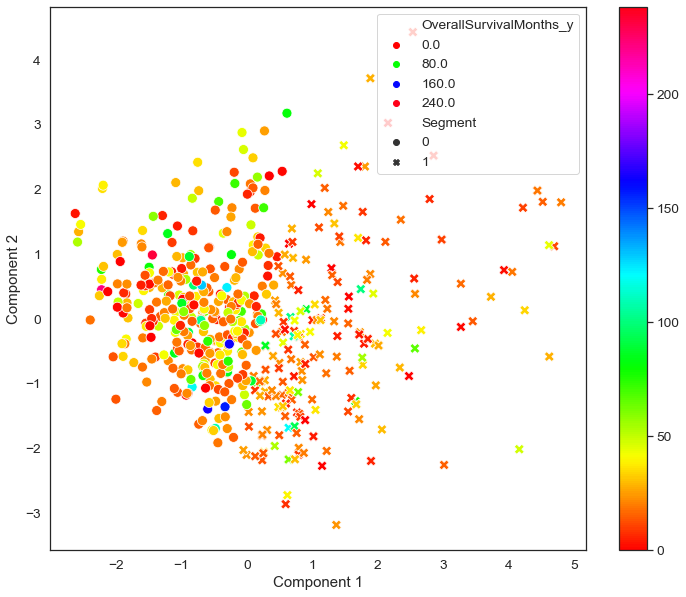

In [37]:
# Plot Graph
points_size=100 #increase scatter point size
plt.figure(figsize=(12,10))
sns.set_style("white")
with sns.plotting_context("notebook", font_scale=1.25):
    ax=sns.scatterplot(x="PC1", y="PC2",
                   data=dt_pca_kmeans,
                   hue="OverallSurvivalMonths_y",
                   style="Segment",
                   palette='hsv',
                   s=points_size,
                   
                   )
    
    norm = plt.Normalize(dt_pca_kmeans['OverallSurvivalMonths_y'].min(), dt_pca_kmeans['OverallSurvivalMonths_y'].max())
    sm = plt.cm.ScalarMappable(cmap="hsv", norm=norm)
    sm.set_array([])
    
    # Remove the legend and add a colorbar
    ax.get_legend()
    ax.figure.colorbar(sm)
    
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\ANALYTICS\CLUSTERING\Flux_pathways_survival_plot.pdf', bbox_inches="tight")